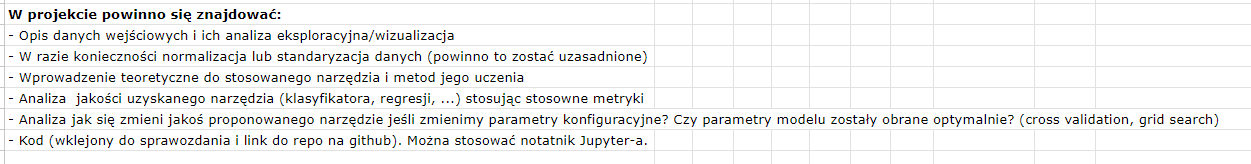

#### To fetch dataset, install ucimlrepo, if already installed, continue without below cell

In [1]:
#pip install ucimlrepo

#### Importing neccessary libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Fetching dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  


#### Data Description

In [4]:
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

As data description shows, all model features are continuous type, which means that they are real number. On the other hand, target values are categorical type, which indicates that in our project we will be using classification algorithms to predict target - Diagnosis.

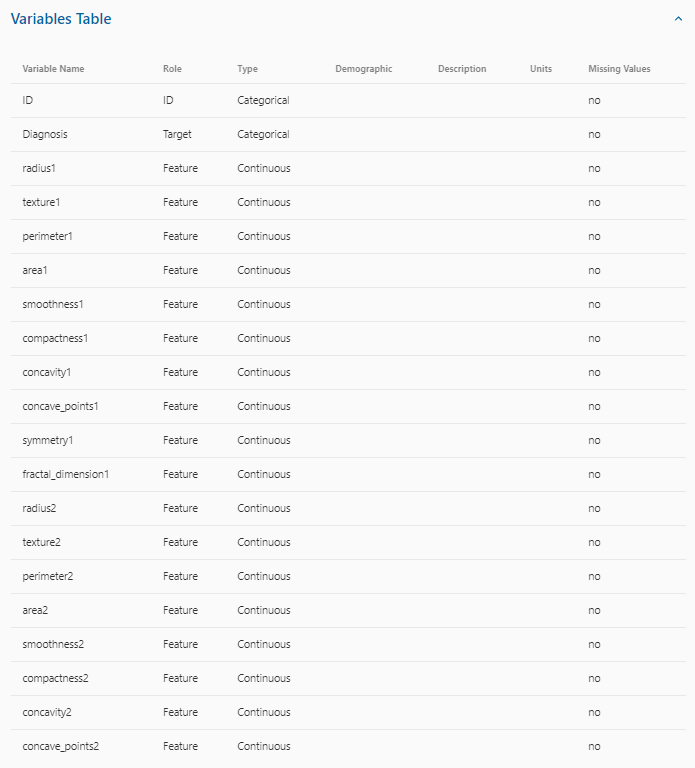
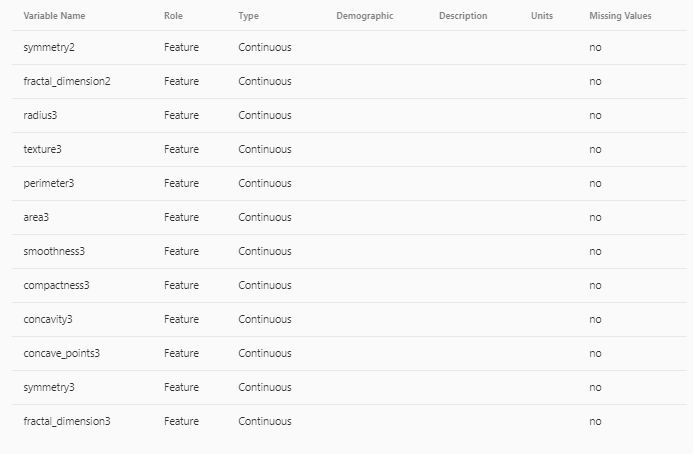

In [5]:
print(X.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In variables table it is shown that data doesn't miss any values. It indicates that in our project we can skip cleaning data. Just in case we checked it using isnull function.

#### Exploratory analysis

Transforming data into pandas' DataFrame. 

In [6]:
df = pd.DataFrame(X)
df['target'] = y

#Cut target column
X = X.iloc[:,:-1]

In [7]:
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


Dataset contains 569 rows. Data model contains 30 features.


As we know that target are categorical type, we can show unique target's values, which we will predict in our model.

In [8]:
print(np.unique(y))

['B' 'M']


There are only 2 target values. "B" means that cancer is benign and "M" means that it's malignant.


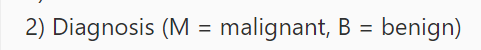

In [9]:
print(X.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

In [20]:
print(X.iloc[0])

radius1                 17.990000
texture1                10.380000
perimeter1             122.800000
area1                 1001.000000
smoothness1              0.118400
compactness1             0.277600
concavity1               0.300100
concave_points1          0.147100
symmetry1                0.241900
fractal_dimension1       0.078710
radius2                  1.095000
texture2                 0.905300
perimeter2               8.589000
area2                  153.400000
smoothness2              0.006399
compactness2             0.049040
concavity2               0.053730
concave_points2          0.015870
symmetry2                0.030030
fractal_dimension2       0.006193
radius3                 25.380000
texture3                17.330000
perimeter3             184.600000
area3                 2019.000000
smoothness3              0.162200
compactness3             0.665600
concavity3               0.711900
concave_points3          0.265400
symmetry3                0.460100
fractal_dimens

At first look it's visible that values are in different scales which may cause worse results in trained model using classification algorithms

In [11]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
print("---Mean---")
print(X.mean(axis=0))

---Mean---
radius1                14.127292
texture1               19.289649
perimeter1             91.969033
area1                 654.889104
smoothness1             0.096360
compactness1            0.104341
concavity1              0.088799
concave_points1         0.048919
symmetry1               0.181162
fractal_dimension1      0.062798
radius2                 0.405172
texture2                1.216853
perimeter2              2.866059
area2                  40.337079
smoothness2             0.007041
compactness2            0.025478
concavity2              0.031894
concave_points2         0.011796
symmetry2               0.020542
fractal_dimension2      0.003795
radius3                16.269190
texture3               25.677223
perimeter3            107.261213
area3                 880.583128
smoothness3             0.132369
compactness3            0.254265
concavity3              0.272188
concave_points3         0.114606
symmetry3               0.290076
fractal_dimension3      0.083946

In [13]:
print("---std---")
print(X.std(axis=0))

---std---
radius1                 3.524049
texture1                4.301036
perimeter1             24.298981
area1                 351.914129
smoothness1             0.014064
compactness1            0.052813
concavity1              0.079720
concave_points1         0.038803
symmetry1               0.027414
fractal_dimension1      0.007060
radius2                 0.277313
texture2                0.551648
perimeter2              2.021855
area2                  45.491006
smoothness2             0.003003
compactness2            0.017908
concavity2              0.030186
concave_points2         0.006170
symmetry2               0.008266
fractal_dimension2      0.002646
radius3                 4.833242
texture3                6.146258
perimeter3             33.602542
area3                 569.356993
smoothness3             0.022832
compactness3            0.157336
concavity3              0.208624
concave_points3         0.065732
symmetry3               0.061867
fractal_dimension3      0.018061


As we can see, data is not standardized, because of standard deviation of features' values are in different scales. For example, "area1" values are much larger than "smoothness1" or "fractal_dimension1" values. Features with larger scales may disproportionately influence the results, and the algorithm may not perform well if the scales are not standardized.

At the diagram below we can see correlation between features in our model. We used pairplot function from seaborn library and matplotlib to show diagram. Green color indicates beign target and red color indicates malignant target.

In [14]:
%matplotlib inline

sns.pairplot(df, diag_kind="kde", hue="target", palette="husl")

After analyzing pairplotted diagram, we can draw some conclusions.


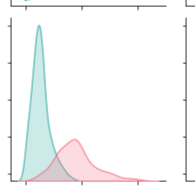
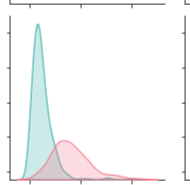
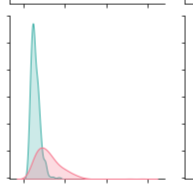
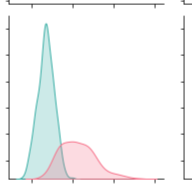
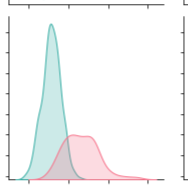
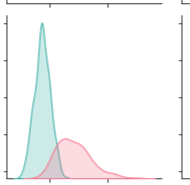
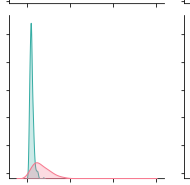

Above, there are normal distributions for some features. In this case correlated features behave different whether are benign or malignant. Benign features are strongly correlated because of the chart's shape, on the other hand malignant features are not as strong correlated as beign features.

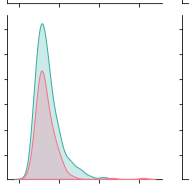
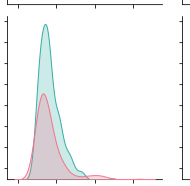
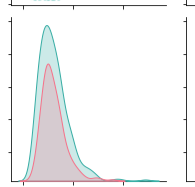

Analyzing above charts, we can conclude that these normal distributions are similarly to each other. Both targets show similar normal distributions.

There are also charts which may indicate outliner's presence. For example below normal distributions.

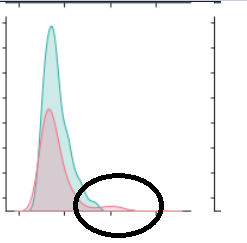
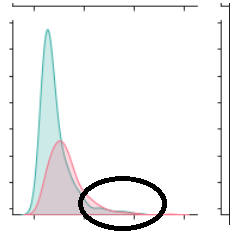

In this situation outliners are located far from central region.

#### Scaling Data

Standardization, also known as feature scaling, is a common preprocessing step in machine learning. It involves transforming the features of dataset so that they have a mean of 0 and a standard deviation of 1. The purpose of standardization is to bring all features onto a common scale, making it easier for machine learning algorithms to learn patterns from the data. Features often have different units or scales. Standardization ensures that all features have a similar scale, preventing certain features from dominating the learning process. When features are standardized, extreme values also have less influence on the overall scale of the feature.

To scale data we will use StandardScaler from sklearn library

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [16]:
print("---Scaled Mean---")
print(scaled_X.mean(axis=0))

---Scaled Mean---
[-1.37363271e-16  6.86816353e-17 -1.24875700e-16 -2.18532476e-16
 -8.36667193e-16  1.87313551e-16  4.99502802e-17 -4.99502802e-17
  1.74825981e-16  4.74527662e-16  2.37263831e-16 -1.12388130e-16
 -1.12388130e-16 -1.31119486e-16 -1.52972733e-16  1.74825981e-16
  1.62338411e-16  0.00000000e+00  8.74129903e-17 -6.24378502e-18
 -8.24179623e-16  1.24875700e-17 -3.74627101e-16  0.00000000e+00
 -2.37263831e-16 -3.37164391e-16  7.49254203e-17  2.24776261e-16
  2.62238971e-16 -5.74428222e-16]


In [17]:
print("---std---")
print(scaled_X.std(axis=0))

---std---
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


As we can see features' mean are very similar in scale to other features. Also standard deviation is 1 for every feature which indicates that data is successfully standardized.

#### Splitting Data to training and testing models

In [21]:
from sklearn.model_selection import train_test_split
#----
#scaled data
X_train_data, X_test_data, \
y_train_target, y_test_target = \
train_test_split(scaled_X, y, test_size=0.1)

In [23]:
print("Training dataset:")
print("X_train_data:", X_train_data.shape)
print("y_train_target:", y_train_target.shape)

Training dataset:
X_train_data: (512, 30)
y_train_target: (512, 1)


In [24]:
print("Testing dataset:")
print("X_test_data:", X_test_data.shape)
print("y_test_target:", y_test_target.shape)

Testing dataset:
X_test_data: (57, 30)
y_test_target: (57, 1)


#### Initiate and train model on training data

#### TODO Wprowadzenie teoretyczne do stosowanego narzędzia i metod jego uczenia

In [27]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_data, np.ravel(y_train_target))

LogisticRegression()

#### Checking predictions using Classifier

In [51]:
id=7
prediction = logistic_regression.predict(X_test_data[id,:].reshape(1,-1))
print("Model predicted for patient {0} value {1}".format(id, prediction))

print("Real value for patient {0} is ['{1}']".format(id, y_test_target.iloc[id,0]))

Model predicted for patient 7 value ['B']
Real value for patient 7 is ['B']


The predict_proba method in scikit-learn's logistic regression model is used to get the predicted probabilities of the input samples belonging to each class. For binary classification problems, it returns an array containing two columns, where the first column corresponds to the probability of the sample belonging to the beningn class and the second column corresponds to the probability of the sample belonging to the malignant class.

In [50]:
prediction_probability = logistic_regression.predict_proba(X_test_data[id,:].reshape(1,-1))
print(prediction_probability)

[[0.95245432 0.04754568]]


The confusion matrix is a table that is often used to evaluate the performance of a classification algorithm on a set of data for which the true values are known. It provides a comprehensive view of the relationships between the actual and predicted class labels.

The confusion matrix is particularly useful for binary classification problems (two classes), and it has four entries:

True Positive (TP): Instances that were correctly predicted as positive.

True Negative (TN): Instances that were correctly predicted as negative.

False Positive (FP): Instances that were incorrectly predicted as positive.

False Negative (FN): Instances that were incorrectly predicted as negative.

In [53]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_target, logistic_regression.predict(X_test_data))
print(conf_matrix)

[[36  0]
 [ 3 18]]


In this case, our model made only 3 mistakes. It chose that patient has malignant cancer but in fact he has benign cancer.

#### Model evaluation with cross-validation

In [59]:
from sklearn.model_selection import cross_val_score
for i in range(3,10,3):
    print("score for cv ={}".format(i))
    scores = cross_val_score(logistic_regression, scaled_X, np.ravel(y), cv=i)
    print(scores)

score for cv =3
[0.97894737 0.97368421 0.97354497]
score for cv =6
[0.98947368 0.97894737 0.96842105 0.97894737 0.97894737 0.9893617 ]
score for cv =9
[0.984375   0.984375   0.98412698 0.98412698 0.95238095 0.98412698
 0.96825397 1.         0.98412698]


The accuracy values are around 98%, suggesting that the model is well-fitted to the data and generalizes effectively to new data. If the goal is to classify new samples, the model seems to work effectively across various data splits.